In [3]:
import numpy as np
from keras.datasets import cifar10
from keras import models
from keras import layers
from keras.layers import Flatten,Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Load Datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Training Dataset Size: ", x_train.shape)
print("Training Labels Size: ", y_train.shape)
print("Testing Dataset Size: ", x_test.shape)
print("Testing Labels Size: ", y_test.shape)

# Taking only 3 classes i.e 0,1,2
x_train = x_train[np.where(y_train[:,0]<3)[0],:]
y_train = y_train[np.where(y_train[:,0]<3)[0],:]
x_val = x_test[np.where(y_test[:,0]<3)[0],:]
y_val = y_test[np.where(y_test[:,0]<3)[0],:]

print("After Selecting three classes")

# The size of the dataset in minimized
print("Training Dataset Size: ", x_train.shape)
print("Training Labels Size: ", y_train.shape)
print("Testing Dataset Size: ", x_test.shape)
print("Testing Labels Size: ", y_test.shape)

# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# normalize images to range 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
val_norm = x_test / 255.0

# train data set into train + validation set
x_val = x_train[:2000]
x_train = x_train[2000:]
y_val = y_train[:2000]
y_train = y_train[2000:]

Training Dataset Size:  (50000, 32, 32, 3)
Training Labels Size:  (50000, 1)
Testing Dataset Size:  (10000, 32, 32, 3)
Testing Labels Size:  (10000, 1)
After Selecting three classes
Training Dataset Size:  (15000, 32, 32, 3)
Training Labels Size:  (15000, 1)
Testing Dataset Size:  (10000, 32, 32, 3)
Testing Labels Size:  (10000, 1)


In [5]:
from keras.engine.training import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,BatchNormalization,Activation,Conv2D,MaxPool2D
model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=x_train.shape[1:],padding='same'))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Conv2D(64,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Conv2D(64,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Conv2D(64,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())


model2.add(Flatten())
model2.add(Dropout(0.2))

model2.add(Dense(256,kernel_constraint=tf.keras.constraints.max_norm(3)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Dense(128,kernel_constraint=tf.keras.constraints.max_norm(3)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Dense(3))
model2.add(Activation('softmax'))

op = 'adam'
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                      

In [6]:
model2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,batch_size=64)

Epoch 1/20
204/204 [==============================] - 102s 490ms/step - loss: 0.6659 - accuracy: 0.7383 - val_loss: 3.6378 - val_accuracy: 0.3390
Epoch 2/20
204/204 [==============================] - 98s 481ms/step - loss: 0.4298 - accuracy: 0.8312 - val_loss: 1.1878 - val_accuracy: 0.6260
Epoch 3/20
204/204 [==============================] - 96s 472ms/step - loss: 0.3405 - accuracy: 0.8669 - val_loss: 0.7328 - val_accuracy: 0.7350
Epoch 4/20
204/204 [==============================] - 98s 478ms/step - loss: 0.2870 - accuracy: 0.8894 - val_loss: 0.2860 - val_accuracy: 0.8895
Epoch 5/20
204/204 [==============================] - 98s 479ms/step - loss: 0.2615 - accuracy: 0.8999 - val_loss: 0.2310 - val_accuracy: 0.9075
Epoch 6/20
204/204 [==============================] - 97s 477ms/step - loss: 0.2328 - accuracy: 0.9103 - val_loss: 0.2224 - val_accuracy: 0.9185
Epoch 7/20
204/204 [==============================] - 97s 475ms/step - loss: 0.2047 - accuracy: 0.9217 - val_loss: 0.2931 - val_a

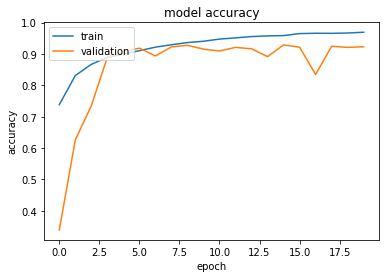

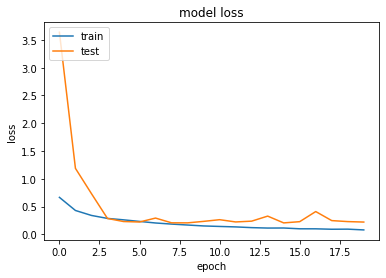

In [7]:
import matplotlib.pyplot as plt
history = model2.history
print(history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save the model
model2.save('model1.hdf5')